# Importing Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization,Flatten
from tensorflow.keras.utils import to_categorical

# Heart Failure Prediction Dataset

## 1) Loading and understanding data

In [2]:
df= pd.read_csv("/content/drive/MyDrive/DL_DATA/heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [4]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

## 2) EDA

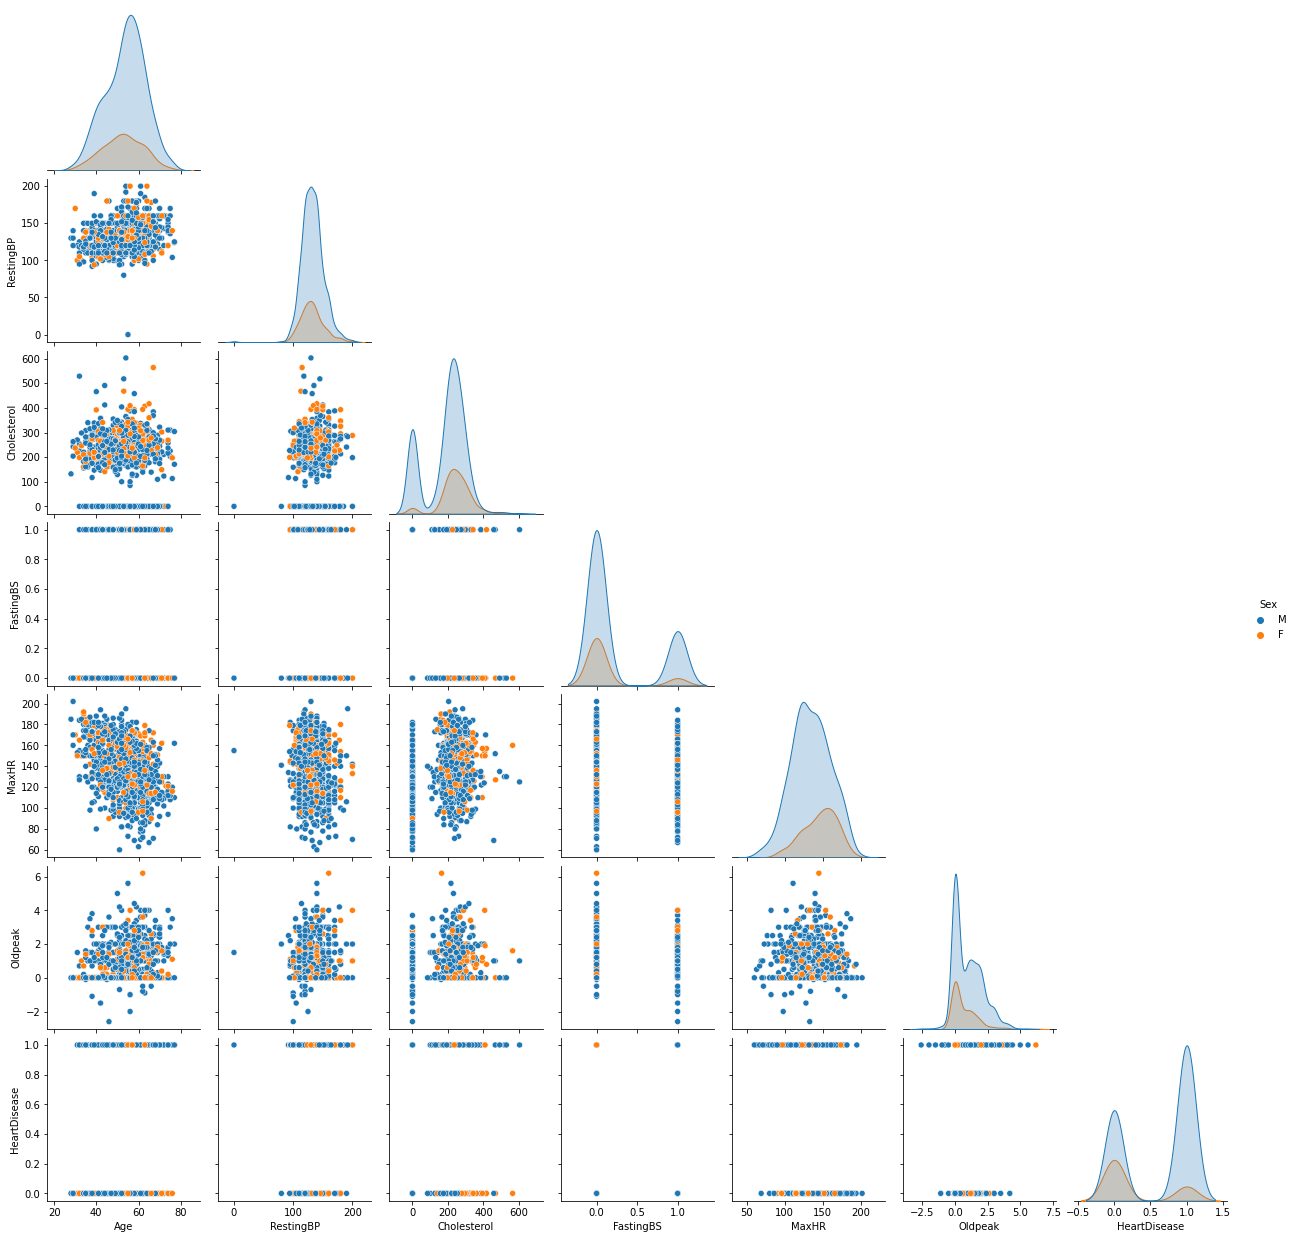

In [5]:
sns.pairplot(df,corner=True,hue='Sex');

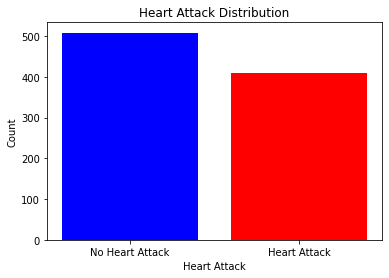

In [6]:
heart_attack_counts = df["HeartDisease"].value_counts()
chest_pain_counts = df["ChestPainType"].value_counts()
plt.bar(x=["No Heart Attack", "Heart Attack"], height=heart_attack_counts, color=["blue", "red"])
plt.title("Heart Attack Distribution")
plt.xlabel("Heart Attack")
plt.ylabel("Count")
plt.show()


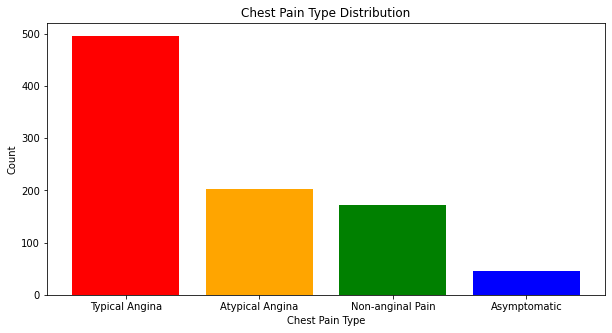

In [7]:
plt.figure(figsize=(10, 5))
plt.bar(x=["Typical Angina", "Atypical Angina", "Non-anginal Pain", "Asymptomatic"], height=chest_pain_counts, color=["red", "orange", "green", "blue"])
plt.title("Chest Pain Type Distribution")
plt.xlabel("Chest Pain Type")
plt.ylabel("Count")
plt.show()

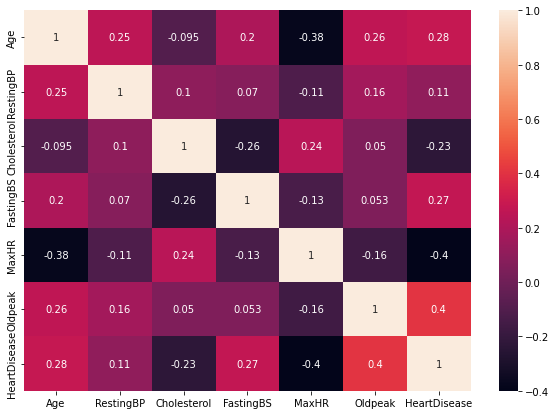

In [8]:
plt.figure(figsize=(10, 7))
sns.heatmap(df.corr(),annot=True);

## 3) Data Preprocessing

In [9]:
x_categorical = df.select_dtypes(include='object')
X_t = df.drop(['ChestPainType','Sex','ExerciseAngina','RestingECG','ST_Slope'],axis=1)
dm = pd.get_dummies(x_categorical)
X = pd.concat([X_t,dm],axis=1)
Y = df['HeartDisease']

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_T,y_train,y_T = train_test_split(X,Y,test_size=0.30,random_state=42)
x_val,x_test,y_val,y_test = train_test_split(x_T,y_T,test_size=0.50,random_state=42)

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_val = sc.fit_transform(x_val)
X_test = sc.transform(x_test)

## 4) Modelling

### Without BatchNormaliation

In [12]:
model = Sequential()
model.add(Dense(64, input_dim=21, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32)

Epoch 1/100
21/21 [==============================] - 4s 106ms/step - loss: 0.5255 - accuracy: 0.8084 - val_loss: 0.3954 - val_accuracy: 0.9203
Epoch 2/100
21/21 [==============================] - 1s 25ms/step - loss: 0.3399 - accuracy: 0.9034 - val_loss: 0.2486 - val_accuracy: 0.9348
Epoch 3/100
21/21 [==============================] - 0s 20ms/step - loss: 0.2313 - accuracy: 0.9143 - val_loss: 0.1789 - val_accuracy: 0.9565
Epoch 4/100
21/21 [==============================] - 0s 19ms/step - loss: 0.1653 - accuracy: 0.9439 - val_loss: 0.1251 - val_accuracy: 0.9783
Epoch 5/100
21/21 [==============================] - 0s 19ms/step - loss: 0.1155 - accuracy: 0.9579 - val_loss: 0.0872 - val_accuracy: 0.9783
Epoch 6/100
21/21 [==============================] - 0s 20ms/step - loss: 0.0742 - accuracy: 0.9875 - val_loss: 0.0577 - val_accuracy: 0.9855
Epoch 7/100
21/21 [==============================] - 0s 20ms/step - loss: 0.0460 - accuracy: 0.9969 - val_loss: 0.0390 - val_accuracy: 1.0000
Epoch

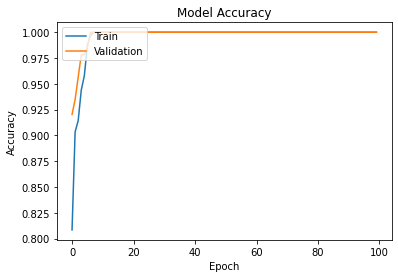

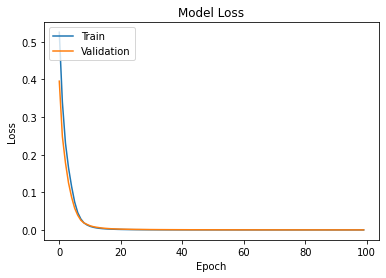

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot the training and validation loss curves
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### With BatchNormaliation

In [14]:
model = Sequential()
model.add(Dense(64, input_dim=21, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32)

Epoch 1/100
21/21 [==============================] - 2s 15ms/step - loss: 0.6372 - accuracy: 0.6807 - val_loss: 0.4414 - val_accuracy: 0.8841
Epoch 2/100
21/21 [==============================] - 0s 5ms/step - loss: 0.2580 - accuracy: 0.9065 - val_loss: 0.3077 - val_accuracy: 0.9348
Epoch 3/100
21/21 [==============================] - 0s 5ms/step - loss: 0.1595 - accuracy: 0.9455 - val_loss: 0.2341 - val_accuracy: 0.9710
Epoch 4/100
21/21 [==============================] - 0s 6ms/step - loss: 0.1053 - accuracy: 0.9782 - val_loss: 0.1766 - val_accuracy: 0.9783
Epoch 5/100
21/21 [==============================] - 0s 7ms/step - loss: 0.0891 - accuracy: 0.9844 - val_loss: 0.1328 - val_accuracy: 0.9855
Epoch 6/100
21/21 [==============================] - 0s 5ms/step - loss: 0.0686 - accuracy: 0.9860 - val_loss: 0.1004 - val_accuracy: 0.9928
Epoch 7/100
21/21 [==============================] - 0s 6ms/step - loss: 0.0566 - accuracy: 0.9922 - val_loss: 0.0788 - val_accuracy: 1.0000
Epoch 8/100


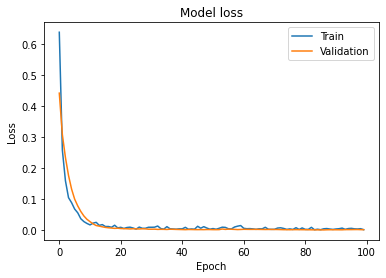

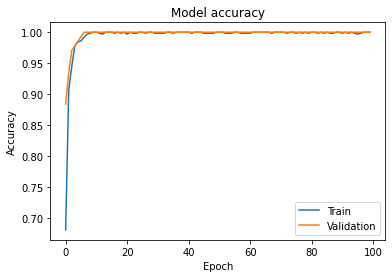

In [15]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [16]:
# Evaluate the model
score = model.evaluate(X_test, y_test)
print("Test Loss:", score[0])
print("Test Accuracy:", score[1])

5/5 [==============================] - 0s 5ms/step - loss: 0.0023 - accuracy: 1.0000
Test Loss: 0.002287868410348892
Test Accuracy: 1.0


From the graph we can say it is a proper fit as the training, validation and test accuracy is 100%.

# Fashion-MNIST Dataset

## 1) Loading the data 

In [17]:
train = pd.read_csv("/content/drive/MyDrive/DL_DATA/fashion-mnist_train.csv")
test = pd.read_csv("/content/drive/MyDrive/DL_DATA/fashion-mnist_test.csv")

In [18]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
train.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000
mean,4.500000,0.000900,0.006150,0.035333,0.101933,0.247967,0.411467,0.805767,2.198283,5.682000,...,34.625400,23.300683,16.588267,17.869433,22.814817,17.911483,8.520633,2.753300,0.855517,0.07025
std,2.872305,0.094689,0.271011,1.222324,2.452871,4.306912,5.836188,8.215169,14.093378,23.819481,...,57.545242,48.854427,41.979611,43.966032,51.830477,45.149388,29.614859,17.397652,9.356960,2.12587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,16.000000,36.000000,226.000000,164.000000,227.000000,230.000000,224.000000,255.000000,254.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.00000


## 2) Data Preprocessing

**We have 28*28 image matrix as row of length 784. Therefore, we will convert the data into image matrix and use it for training with one hot encoded labels**

In [20]:
y_train = train.iloc[:,0:1]
x_train = train.iloc[:,1:]
y_test = test.iloc[:,0:1]
x_test = test.iloc[:,1:]


In [23]:
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size=0.20,random_state=42)

In [27]:
# x_train = x_train.to_numpy()
# x_val = x_val.to_numpy()
# x_test = x_test.to_numpy()
x_train = x_train.reshape((len(x_train), 28, 28))
x_val = x_val.reshape((len(x_val), 28, 28))
x_test = x_test.reshape((len(x_test), 28, 28))

In [28]:
y_train_cat = to_categorical(y_train)
y_val_cat = to_categorical(y_val)
y_test_cat = to_categorical(y_test)


## 3) Modelling

### Without BatchNormaliation

In [29]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(28,28,)))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model to the training data
history = model.fit(x_train, y_train_cat, epochs=10, batch_size=32, validation_data=(x_val, y_val_cat))


Epoch 1/10
1500/1500 [==============================] - 9s 6ms/step - loss: 1.8698 - accuracy: 0.5266 - val_loss: 1.0821 - val_accuracy: 0.6013
Epoch 2/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.9057 - accuracy: 0.6679 - val_loss: 0.7769 - val_accuracy: 0.7102
Epoch 3/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.6282 - accuracy: 0.7651 - val_loss: 0.5472 - val_accuracy: 0.7986
Epoch 4/10
1500/1500 [==============================] - 8s 6ms/step - loss: 0.4955 - accuracy: 0.8215 - val_loss: 0.5267 - val_accuracy: 0.8121
Epoch 5/10
1500/1500 [==============================] - 13s 9ms/step - loss: 0.4444 - accuracy: 0.8418 - val_loss: 0.4787 - val_accuracy: 0.8356
Epoch 6/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.4117 - accuracy: 0.8529 - val_loss: 0.4806 - val_accuracy: 0.8327
Epoch 7/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3941 - accuracy: 0.8610 - val_loss: 0.4960 - val_accur

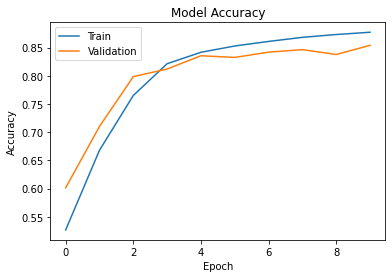

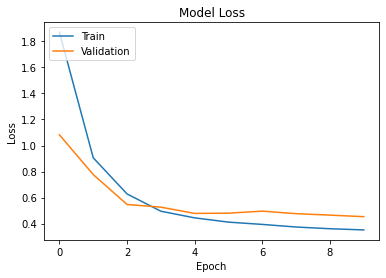

In [30]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot the training and validation loss curves
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### With BatchNormaliation

In [31]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(28,28,)))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model to the training data
history = model.fit(x_train, y_train_cat, epochs=10, batch_size=32, validation_data=(x_val, y_val_cat))


Epoch 1/10
1500/1500 [==============================] - 13s 8ms/step - loss: 0.4798 - accuracy: 0.8342 - val_loss: 0.3917 - val_accuracy: 0.8592
Epoch 2/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.3559 - accuracy: 0.8722 - val_loss: 0.3449 - val_accuracy: 0.8729
Epoch 3/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.3208 - accuracy: 0.8838 - val_loss: 0.3344 - val_accuracy: 0.8774
Epoch 4/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.2975 - accuracy: 0.8909 - val_loss: 0.3402 - val_accuracy: 0.8790
Epoch 5/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.2806 - accuracy: 0.8976 - val_loss: 0.3581 - val_accuracy: 0.8764
Epoch 6/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.2639 - accuracy: 0.9028 - val_loss: 0.3222 - val_accuracy: 0.8892
Epoch 7/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.2546 - accuracy: 0.9045 - val_loss: 0.3264 - val_ac

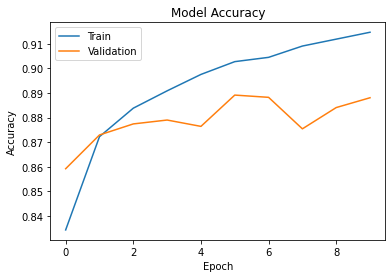

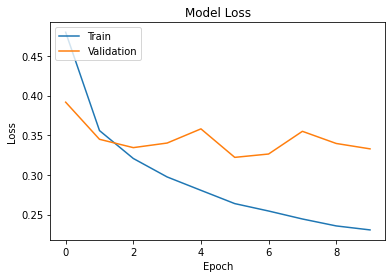

In [32]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot the training and validation loss curves
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [33]:
# Evaluate the model
score = model.evaluate(x_test, y_test_cat)
print("Test Loss:", score[0])
print("Test Accuracy:", score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.3274 - accuracy: 0.8932
Test Loss: 0.3274102210998535
Test Accuracy: 0.8931999802589417


The model overfits